# Estimación máximo-verosímil

## Log-verosimilitud negativa

Sea un modelo de regresión lineal por mínimos cuadrados $p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\mathcal{N}(y\mid\mu,\sigma^2)\;$ con $\;\mu=\boldsymbol{w}^t\boldsymbol{x}\;$ y $\;\boldsymbol{\theta}=(\boldsymbol{w}, \sigma^2)$. La log-verosimilitud negativa de $\boldsymbol{\theta}$ respecto a $N$ datos $\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\;$ es:
$$\begin{align*}
\operatorname{NLL}(\boldsymbol{\theta})%
&=-\log p(\mathcal{D}\mid\boldsymbol{\theta})\\%
&=-\log \prod_{n=1}^N \mathcal{N}(y_n\mid \hat{y}_n, \sigma^2)%
&&\text{($\hat{y}_n=\boldsymbol{w}^t\boldsymbol{x}_n$)}\\%
&=-\sum_{n=1}^N -\frac{1}{2}\log(2\pi\sigma^2)-\frac{1}{2\sigma^2}(y_n-\hat{y}_n)^2\\%
&=\frac{N}{2}\log(2\pi\sigma^2)+\frac{1}{2\sigma^2}\sum_n (y_n-\hat{y}_n)^2%
\end{align*}$$
El MLE de $\boldsymbol{\theta}$, $\hat{\boldsymbol{\theta}}$, debe satisfacer
$\;\boldsymbol{\nabla}_{\boldsymbol{\theta}}\operatorname{NLL}(\boldsymbol{\theta})\rvert_{\hat{\boldsymbol{\theta}}}=\boldsymbol{0}$
$\;$ o, equivalentemente:
$$\boldsymbol{\nabla}_{\boldsymbol{\boldsymbol{w}}}\operatorname{NLL}(\boldsymbol{\theta})\rvert_{\hat{\boldsymbol{\theta}}}=\boldsymbol{0}%
\quad\text{y}\quad%
\frac{\partial \operatorname{NLL}(\boldsymbol{\theta})}{\partial\sigma^2}\Bigr\rvert_{\hat{\boldsymbol{\theta}}}=0$$

## Suma residual de cuadrados y solución OLS

El $\hat{\boldsymbol{w}}$ que satisface la primera de las condiciones anteriores puede hallarse con independencia de $\sigma^2$, minimizando la **suma residual de cuadrados**:
$$\operatorname{RSS}(\boldsymbol{w})%
=\frac{1}{2}\sum_n(y_n-\boldsymbol{w}^t\boldsymbol{x}_n)^2%
=\frac{1}{2}\lVert\mathbf{X}\boldsymbol{w}-\boldsymbol{y}\rVert_2^2%
=\frac{1}{2}(\mathbf{X}\boldsymbol{w}-\boldsymbol{y})^t(\mathbf{X}\boldsymbol{w}-\boldsymbol{y})$$
Se puede comprobar que el gradiente de la $\operatorname{RSS}$ es:
$$\mathbf{\nabla}_{\boldsymbol{w}}\operatorname{RSS}(\boldsymbol{w})%
=\mathbf{X}^t\mathbf{X}\boldsymbol{w}-\mathbf{X}^t\boldsymbol{y}$$
Igualando a cero el gradiente se obtienen las **ecuaciones normales**,
$$\mathbf{X}^t\mathbf{X}\boldsymbol{w}=\mathbf{X}^t\boldsymbol{y}$$
y la solución **ordinary least squares (OLS)**,
$$\hat{\boldsymbol{w}}=\mathbf{X}^{\dagger}\boldsymbol{y}$$
donde $\mathbf{X}^{\dagger}$ es la pseudoinversa izquierda de $\mathbf{X}$,
$$\mathbf{X}^{\dagger}=(\mathbf{X}^t\mathbf{X})^{-1}\mathbf{X}^t$$
La solución OLS es un mínimo global si $\mathbf{X}$ es de rango completo.

## MLE de la varianza

Tras hallar $\hat{\boldsymbol{w}}$, $\hat{\sigma}^2$ se obtiene como el error cuadrático medio de los residuos:
$$\hat{\sigma}^2%
=\operatorname*{argmin}_{\sigma^2}\;\operatorname{NLL}(\hat{\boldsymbol{w}},\sigma^2)%
=\frac{1}{N}\sum_n (y_n-\hat{\boldsymbol{w}}^t\boldsymbol{x}_n)^2$$

## Ejemplo

Modelo con $\;\mu=f(x;\boldsymbol{w})=w_0+w_1x+w_2x^2$, $\;w_0=0$, $\;w_1=-1.5$ $\;$, $\;w_2=1/9\;$ y $\;\sigma^2=4\;$; $\;x\in[0,20]$. Generamos $N$ muestras de entrenamiento y $200$ de test uniformemente distribuidas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
w0 = 0; w1 = -1.5; w2 = 1/9; sigma = 2; N = 21; np.random.seed(0)
X_train = np.linspace(0.0, 20, N); X_test = np.arange(0.0, 20, 0.1)
y_train = w0 + w1 * X_train + w2 * X_train * X_train + np.random.normal(0, sigma, X_train.shape)
y_test = w0 + w1 * X_test + w2 * X_test * X_test + np.random.normal(0, sigma, X_test.shape)
print(X_train.shape, X_test.shape)

(21,) (200,)


Ajustamos un modelo lineal ($w_2=0$) y lo comparamos visualmente con el modelo verdadero (cuadrático).

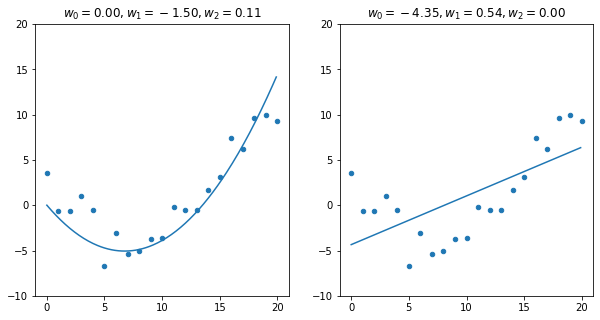

In [2]:
w = np.linalg.lstsq(np.c_[np.ones((N,1)), X_train], y_train, rcond=None)[0]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_ylim([-10, 20]); axes[0].scatter(X_train, y_train, s=20)
axes[0].set_title('$w_0={:.2f}, w_1={:.2f}, w_2={:.2f}$'.format(w0, w1, w2))
axes[0].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test)
axes[1].set_ylim([-10, 20]); axes[1].scatter(X_train, y_train, s=20)
axes[1].set_title('$w_0={:.2f}, w_1={:.2f}, w_2={:.2f}$'.format(w[0], w[1], 0))
axes[1].plot(X_test, w[0] + w[1] * X_test);

Veamos que el modelo lineal ajustado minimiza la suma residual de cuadrados:

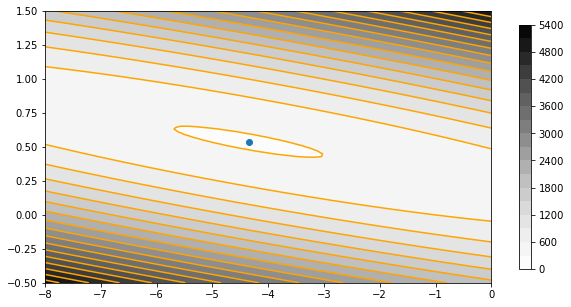

In [3]:
W0, W1 = np.meshgrid(np.linspace(-8, 0, 100), np.linspace(-0.5, 1.5, 100))
WW = np.c_[np.ravel(W0), np.ravel(W1)]
RSS = lambda ww: sum( (ww[0] + ww[1] * X_train - y_train)**2 )
RSSmap = np.apply_along_axis(RSS, 1, WW)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.contour(W0, W1, RSSmap.reshape(W0.shape), 16, colors='orange', linestyles='solid')
cp = ax.contourf(W0, W1, RSSmap.reshape(W0.shape), 16, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.9)
plt.scatter(w[0], w[1]);